# Real World Examples - Histograms, Pie Charts, Box & Whisker Charts
Keith Galli task - based on video https://www.youtube.com/watch?v=0P7QnIQDBJY&feature=youtu.be  
Histograms, Pie Charts, Box & Whisker Chart

#### Load the Libraries

In [47]:
#Load the Necessary Libraries
import numpy as np
import pandas as pd

#This is a library for creating graphs - 
    #sometimes additional libraries are also needed
    #& matplotlib is not the only option for creating graphs
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Cleaning the Data

Before creating any of the charts below, you should check the datasets for null values.

#### Cleaning the Fifa Dataset

In [2]:
#Read in the file
df = pd.read_csv('fifa_data.csv')

#Examine the first five rows of your dataframe
df.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
#Get the shape of the dataframe - This dataset is enormous. 
df.shape

(18207, 89)

In [4]:
#As Jupyter can provide us with index references we can delete the first column in our dataframe - delete it
df = df.drop(df.columns[[0]], axis=1) 

#Display the shape of the dataframe
df.shape

(18207, 88)

In [5]:
#Examine the first five rows of your dataframe again
df.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
#check for null values
df.isna().sum()

#The output generated here does not give us a clear picture.

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [7]:
#Count the number of null values in the columns we will be using - Preferred Foot
#There are 48 null values in this column
  #when we consider the number of records in the DataFrame the simpliest thing to do would be to delete the rows
df['Preferred Foot'].isna().sum()

48

In [8]:
#Count the number of null values in the columns we will be using - Club
df['Club'].isna().sum()

241

In [9]:
#Count the number of null values in the columns we will be using - Weight
df['Weight'].isna().sum()

48

In [10]:
#Count the number of null values in the columns we will be using - Composure
df['Composure'].isna().sum()

48

In [35]:
#It would have been easier to

#Get the null values and save them in a variable called nulls
  #the results returned are a Pandas Series
nulls = df.isna().sum()

#To check the type of nulls
#print(type(nulls))

#To print each item in a Series
for items in nulls.items():
    print(items)

('ID', 0)
('Name', 0)
('Age', 0)
('Photo', 0)
('Nationality', 0)
('Flag', 0)
('Overall', 0)
('Potential', 0)
('Club', 0)
('Club Logo', 0)
('Value', 0)
('Wage', 0)
('Special', 0)
('Preferred Foot', 0)
('International Reputation', 0)
('Weak Foot', 0)
('Skill Moves', 0)
('Work Rate', 0)
('Body Type', 0)
('Real Face', 0)
('Position', 0)
('Jersey Number', 0)
('Joined', 1264)
('Loaned From', 16654)
('Contract Valid Until', 0)
('Height', 0)
('Weight', 0)
('LS', 1992)
('ST', 1992)
('RS', 1992)
('LW', 1992)
('LF', 1992)
('CF', 1992)
('RF', 1992)
('RW', 1992)
('LAM', 1992)
('CAM', 1992)
('RAM', 1992)
('LM', 1992)
('LCM', 1992)
('CM', 1992)
('RCM', 1992)
('RM', 1992)
('LWB', 1992)
('LDM', 1992)
('CDM', 1992)
('RDM', 1992)
('RWB', 1992)
('LB', 1992)
('LCB', 1992)
('CB', 1992)
('RCB', 1992)
('RB', 1992)
('Crossing', 0)
('Finishing', 0)
('HeadingAccuracy', 0)
('ShortPassing', 0)
('Volleys', 0)
('Dribbling', 0)
('Curve', 0)
('FKAccuracy', 0)
('LongPassing', 0)
('BallControl', 0)
('Acceleration', 0)
(

We are simply going to drop the null values in each of the columns that we intend to use.  

As you know there are various other options available to handle null values, but when we consider the number of records in the DataFrame the simpliest thing to do would be to delete the rows.

Why do we only drop the null values in the columns we are using? Would it not be easier to drop all null values in the DataFrame?

In [12]:
#drop rows with null values in the Preferred Foot column
df = df.dropna(how='any', subset=['Preferred Foot'])
df['Preferred Foot'].isna().sum()

0

In [13]:
#drop rows with null values in the Weight column
df = df.dropna(how='any', subset=['Weight'])
df['Weight'].isna().sum()

0

In [14]:
#drop rows with null values in the Club column
df = df.dropna(how='any', subset=['Club'])
df['Club'].isna().sum()

0

In [15]:
#drop rows with null values in the Composure column
df = df.dropna(how='any', subset=['Composure'])
df['Composure'].isna().sum()

0

## CREATING CHARTS 


## 1 Create a Histograms

A histogram takes in a series of data and divides the data into a number of bins. It then plots the frequency data points in each bin (i.e. the interval of points). It is useful in understanding the count of data ranges.  

### Histogram #1: A Histogram to Show a Summary of the Overall column in the Fifa DataFrame

In [48]:
#Examine the first five rows of your dataframe
df.head(5)



,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### Creating the Histogram - Specifying the Bins, Adding a Title, Labelling the Axis and Changing the Colour of the Histogram

These 2 lines of code would create the most basic chart - but obviously we need things like titles, labels, etc  
  
plt.hist(df.Overall)  
plt.show()

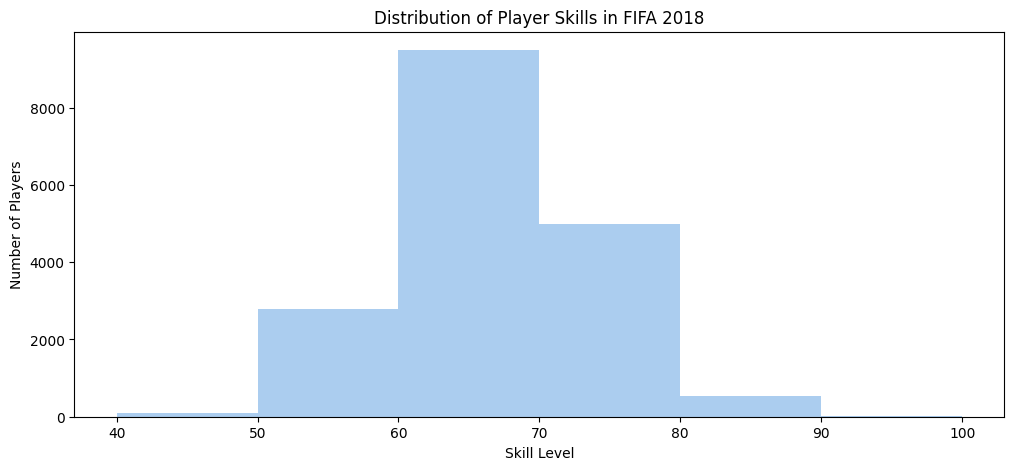

In [17]:
#Creating a Histogram with Formatting

#Specify the increments (bins) 
  #to help decide on the best starting and ending point for bins you could calculate the max and min values in the column
bins = [40,50,60,70,80,90,100]

#Specify a chart size
plt.figure(figsize=(12,5))

#The histogram will use the values in the bins list to summarise the Overall column in DataFrame
  #It will basically count the number of occurences in each band (bin)
#You can change the default colour of the chart - do a goodle search for a colour picker and copy the hex code
plt.hist(df.Overall, bins=bins, color='#abcdef')

#The ticks at the bottom will use the values in the bins list 
plt.xticks(bins)

##Add a title and labels
plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Player Skills in FIFA 2018')

#Save the chart
#plt.savefig('histogram.png', dpi=300)

plt.show()

### Histogram #2: Create A Histogram to Show a Summary of the Composure column in the Fifa DataFrame

* ~~Make the size of the chart 12 * 8~~
* Specify Appropriate Bins - you might want to find the max and the min in the Composure column
* Provide a meaningful title
* Add labels to the Axes
* Change the colour of the Histogram so that it is different from the one above

In [18]:
####Creating the Histogram 
#Creating a Histogram with Formatting

#Specify the increments (bins) 
  #to help decide on the best starting and ending point for bins you could calculate the max and min values in the column
bins = [40,50,60,70,80,90,100]

#Specify a chart size
plt.figure(figsize=(12,8))

#The histogram will use the values in the bins list to summarise the Overall column in DataFrame
  #It will basically count the number of occurences in each band (bin)
#You can change the default colour of the chart - do a goodle search for a colour picker and copy the hex code
plt.hist(df.Overall, bins=bins, color='#abcdef')

#The ticks at the bottom will use the values in the bins list 
plt.xticks(bins)

##Add a title and labels
plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Player Skills in FIFA 2018')

#Save the chart
#plt.savefig('histogram.png', dpi=300)

plt.show()



## 2 Create Pie Charts
A Pie Chart is a circular plot which is divided into slices to illustrate numerical proportion. The slices of the pie chart are used to show the proportion of parts out of a whole.

### Pie Chart #1 - Proportion of Players who Prefer Left Foot or Right Foot

#### Examine the Dataframe

In [19]:
#Examine the first five rows of your dataframe
df.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### Filter and Count the Number of Players who Play with their Left Foot. Repeat for the Right Foot.

In [50]:
#Filter & Count - Adding [0] after count will return the number of records in that list
left = df['Preferred Foot'].value_counts()['Left']
print(left)

#Filter & Count - Adding [0] after count will return the number of records in that list
right = df['Preferred Foot'].value_counts()['Right']
print(right)

#Add the results to a list
preferredFoot = [left, right]

4162
13756


#### Creating and Formatting the Pie Chart

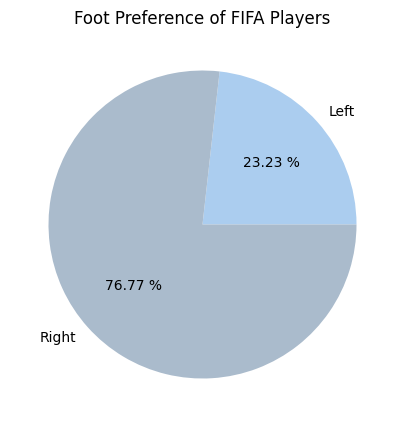

In [21]:
#Set the chart size
plt.figure(figsize=(8,5))

#specify the labels for each segment - make sure that they match the order of preferredFoot list
labels = ['Left', 'Right']
#Specify the colours for each segment 
  #you can use the color picker at w3schools: https://www.w3schools.com/colors/colors_picker.asp
colors = ['#abcdef', '#aabbcc']

#When drawing a pie chart you need to pass in the values - see the [] part below
#Notice the percent notation to round your percentages. Using %% means that you want a % symbol included
plt.pie(preferredFoot, labels =labels, colors=colors, autopct='%.2f %%')

#Specify the title
plt.title('Foot Preference of FIFA Players')

#Plot the chart
plt.show()

### Pie Chart #2 - A Pie Chart Showing the Proportion of Players in Different Weight Categories

Weight categories:
* less then 125lbs
* greater than or equal to 125lbs and less than 150lbs 
* greater than or equal to 150lbs and less than 175lbs 
* greater than or equal to 175lbs and less than 200lbs 
* greater than or equal to 200lbs 

#### Analysing the Values in the Weight Column

In [22]:
#Display the content of the Weight column - to see the format of the data
df.Weight

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 17918, dtype: object

In [23]:
#What datatype is Weight
df.Weight.dtypes

dtype('O')

In [24]:
#To be able to filter the data we have to get rid of the text in the column
#This code will strip lbs off the string and make the value numeric - this is a shorthand way of writing an If.. Else in Python 
df.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in df.Weight]
df.Weight

0        159
1        183
2        150
3        168
4        154
        ... 
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 17918, dtype: int64

In [25]:
#What datatype is Weight now
df.Weight.dtypes

dtype('int64')

#### Filter & Count the Number in Each Weight Category

In [26]:
#Filtering the data into Weight Categories and Counting the Numbers
light = df.Weight[df.Weight < 125].count()

light_medium = df.Weight[(df.Weight >= 125) & (df.Weight < 150)].count()

medium = df.Weight[(df.Weight >= 150) & (df.Weight < 175)].count()

medium_heavy = df.Weight[(df.Weight >= 175) & (df.Weight < 200)].count()

heavy = df.Weight[df.Weight >= 200].count()

#Add the results to a list
weights = [light,light_medium, medium, medium_heavy, heavy]
print(weights)

[41, 2264, 10725, 4523, 365]


#### Creating and Formatting the Pie Chart

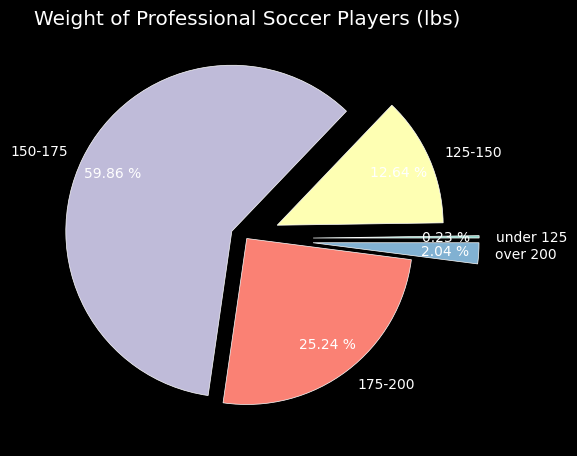

In [73]:
#Set the chart size
plt.figure(figsize=(8,5), dpi=100)

#Choose a colour scheme style - check out the various colour schemes here
 #https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
 #notice that we don't need to use the color parameter if we choose the style
plt.style.use('dark_background')

#specify the labels for each segment - make sure that they match the order of the weights list
label = ['under 125', '125-150', '150-175', '175-200', 'over 200']

#If values are difficult to see in your chart you can break the pie chart apart
#explode = (.1,.1,.1,.1,.1)
#Or - You can choose different values for each segment
explode = (.4,.2,.1,0,.4)

plt.title('Weight of Professional Soccer Players (lbs)')

#plot the chart specifying parameters
  #pctdistance is the distance of your label from the centre of the pie chart
plt.pie(weights, labels=label, explode=explode, pctdistance=0.8,autopct='%.2f %%')
plt.show()

### Pie Chart #3 - Create a Pie Chart to Show the Proportion of Players in Different Age Categories

Age Categories:
* less than 20
* greater than or equal to 20 and less than 25 
* greater than or equal to 25 and less than 30 
* greater than or equal to 30 and less than 35 
* greater than or equal to 35 and less than 40 
* greater than or equal to 40

#### Filter & Count the Number in Each Age Category

In [78]:
#Filtering the data into Age Categories and Counting the Numbers

age_teen = df[df['Age'] < 20]['Age'].count()

age_young_adult = df[(df['Age'] >= 20) & (df['Age'] < 25)]['Age'].count()

age_adult = df[(df['Age'] >= 25) & (df['Age'] < 30)]['Age'].count()

age_established = df[(df['Age'] >= 30) & (df['Age'] < 35)]['Age'].count()

age_experienced = df[(df['Age'] >= 35) & (df['Age'] < 40)]['Age'].count()

age_senior = df[df['Age'] >= 40]['Age'].count()

#Add the results to a list
ageBands = [age_teen, age_young_adult, age_adult, age_established, age_experienced, age_senior]
print(ageBands)

[2075, 6600, 5805, 2958, 459, 21]


#### Creating and Formatting the Pie Chart

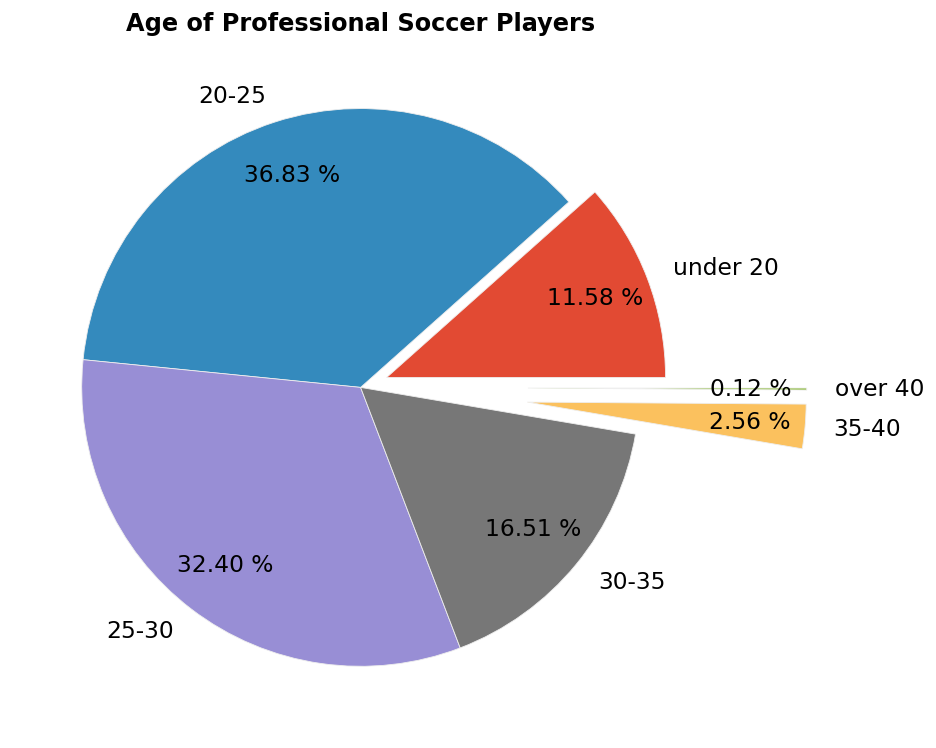

In [143]:
#Add a Title, Add Labels, and Explode the Pie Chart if Necessary (you will need 6 parameters with explode if you have 6 segments)
#Choose your own colours for the segments - you will have to look at the first Pie Chart example
  #you will need to create a colors list and use the color parameter when plotting the chart

#Set the chart size
plt.figure(figsize=(10,7), dpi=120)

#Choose a colour scheme style - check out the various colour schemes here
 #https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
 #notice that we don't need to use the color parameter if we choose the style
plt.style.use('ggplot')

#specify the labels for each segment - make sure that they match the order of the weights list
label = ['under 20', '20-25', '25-30', '30-35', '35-40', 'over 40']


#If values are difficult to see in your chart you can break the pie chart apart
#explode = (.1,.1,.1,.1,.1)

#Or - You can choose different values for each segment
#explode = (0.1,0,0,0,0.6,0.6)

#plt.title('Age of Professional Soccer Players')

#plot the chart specifying parameters
  #pctdistance is the distance of your label from the centre of the pie chart
#plt.pie(ageBands, labels=label, explode=explode, pctdistance=0.8,autopct='%.2f %%')

# Specify text properties with a dictionary
textprops = {"color":"black", 'fontsize': 14}

# Custom colors for each segment
#colors = ['#ff9999','red','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

plt.title('Age of Professional Soccer Players', color='black', fontdict={'weight': 'bold'})

# Plot the chart specifying parameters and using custom text properties and colors
plt.pie(ageBands, labels=label, explode=explode, pctdistance=0.8, autopct='%.2f %%', textprops=textprops) #colors=colors explode=explode auto fixes the chart so nothing is obscured. Fix spacing

plt.show()


## 3 Create Box and Whiskers Charts 
  

A Box and Whisker Plot (or Box Plot) is a convenient way of visually displaying the data distribution through their quartiles.

The lines extending parallel from the boxes are known as the “whiskers”, which are used to indicate variability outside the upper and lower quartiles. Outliers are sometimes plotted as individual dots that are in-line with whiskers. Box Plots can be drawn either vertically or horizontally.

Although Box Plots may seem primitive in comparison to a Histogram or Density Plot, they have the advantage of taking up less space, which is useful when comparing distributions between many groups or datasets.

Here are the types of observations one can make from viewing a Box Plot:
* What the key values are, such as: the average, median 25th percentile etc.
* If there are any outliers and what their values are.
* Is the data symmetrical.
* How tightly is the data grouped.
* If the data is skewed and if so, in what direction.

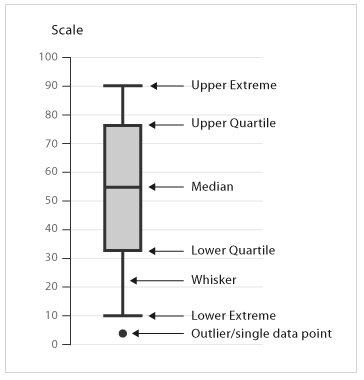

### Box and Whiskers Chart #1 - Show Overall Performance Scores for Players in Different Teams

#### Extracting the Overall Results for Players in Each Club

In [145]:
#Extract the Overall performance score for players from each of the following teams - we will use these values in our chart
barcelona = df.loc[df.Club == "FC Barcelona"]['Overall']
madrid = df.loc[df.Club == "Real Madrid"]['Overall']
dc = df.loc[df.Club == "Derry City"]['Overall']

#Add the results to a list
clubsPerformance = [barcelona, madrid, dc]

#Uncomment the lines below to Explore the results of the extracted data - what is this?
#print(barcelona)
print(barcelona.count())

33


#### Fomatted Box and Whisker Chart

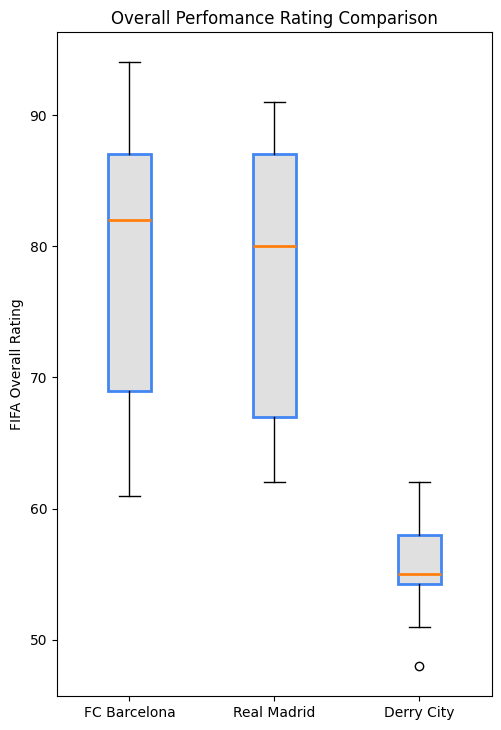

In [146]:
plt.figure(figsize=(5,8), dpi=100)

plt.style.use('default')

#specify the labels for each segment - make sure that they match the order of the clubs list
label = ['FC Barcelona','Real Madrid','Derry City']

#Plot the chart using required parameters
#patch_artist is a facecolour
bp = plt.boxplot(clubsPerformance, labels=label, patch_artist=True, medianprops={'linewidth': 2})

plt.title('Overall Perfomance Rating Comparison')
plt.ylabel('FIFA Overall Rating')

#We can style the boxes
for box in bp['boxes']:
    # change outline color
    box.set(color='#4286f4', linewidth=2)
    # change fill color to grey - but you must set patch_artist property to True - see above
    box.set(facecolor = '#e0e0e0' )
    # change hatch
    #box.set(hatch = '/')
    
plt.show()

### Box and Whiskers Chart #2 - Create a Box & Whiskers Chart to Show the Ages of Players in Different Teams

Extract the Ages of Players at Juventus, Manchester City, Manchester United & Derry City
* Provide a meaningful title
* Provide a meaningful y label
* Provide a meaningful label list - you have 4 teams, you will need 4 labels
* Make the box colour different from the boxes in the example above

#### Extracting the Age of Players in Each Club

In [172]:
#Extract the Overall performance score for players from each of the following teams - we will use these values in our chart
juventus = df.loc[df.Club == "Juventus"]['Age']
manchesterCity = df.loc[df.Club == "Manchester City"]['Age']
manchesterUtd = df.loc[df.Club == "Manchester United"]['Age']
dc = df.loc[df.Club == "Derry City"]['Age']

#Add the results to a list
clubsAge = [juventus, manchesterCity, manchesterUtd, dc]

#Uncomment the lines below to Explore the results of the extracted data - what is this?
#print(juventus)
print(juventus.count())

25


In [150]:
print(df['Club'].nunique())

651


In [159]:
temp_df = df['Club'].nunique()

### Below not required for this task but may be useful for assignment

Assuming clubsAges is a dictionary with club names as keys and lists of ages as values
clubsAges = df.groupby('Club')['Age'].apply(list).to_dict()

Print the entire dictionary if needed
print(clubsAges)

Print ages of players from Juventus as an example
print(clubsAges['Juventus'])

To iterate over the dictionary and print player ages for each club
for club, ages in clubsAges.items():
    print(f"{club} player ages:", ages)

If you want a list of all ages across all clubs
list_of_all_ages = [age for ages in clubsAges.values() for age in ages]


In [170]:
#Extract the Age of players from each team - we will use these values in our chart

#Add the results to a list named clubsAges

#clubsAges = df.groupby('Club')['Age'].apply(list).reset_index(name='Ages') WRONG
#clubsAges = df.groupby('Club')['Age'].apply(list).to_dict()

##print(clubsAges)
#print(clubsAges['Juventus'])

##list_of_clubs_ages = clubsAges['Age'].tolist()


#for club in clubsAges['Club']:
    #print(f"{club} player ages:", clubsAges[clubsAges['Club'] == club]['Age'].values[0])


{' SSV Jahn Regensburg': [32, 33, 29, 25, 25, 29, 25, 25, 26, 28, 27, 26, 24, 22, 23, 33, 22, 28, 26, 22, 27, 19, 31, 24, 24, 23, 20, 25, 21], '1. FC Heidenheim 1846': [32, 27, 30, 27, 31, 29, 23, 27, 31, 25, 23, 24, 27, 25, 23, 20, 23, 21, 25, 19, 24, 23, 21, 17, 18, 18, 21, 18], '1. FC Kaiserslautern': [23, 28, 25, 26, 27, 27, 32, 25, 21, 33, 27, 22, 25, 20, 21, 23, 21, 32, 20, 20, 23, 22, 19, 20, 19, 19], '1. FC Köln': [25, 28, 21, 30, 22, 28, 23, 28, 27, 25, 28, 27, 26, 28, 26, 35, 22, 32, 20, 22, 23, 21, 21, 20, 18, 17, 19, 19], '1. FC Magdeburg': [31, 27, 26, 30, 32, 30, 22, 24, 21, 30, 21, 25, 29, 27, 23, 22, 23, 22, 23, 22, 20, 25, 25, 23, 19, 20], '1. FC Nürnberg': [22, 28, 29, 24, 24, 29, 24, 25, 26, 23, 29, 24, 26, 21, 34, 23, 25, 23, 21, 24, 21, 23, 24, 20, 19, 20, 22, 19, 18], '1. FC Union Berlin': [30, 31, 27, 26, 27, 32, 29, 27, 31, 26, 21, 26, 22, 24, 22, 25, 22, 23, 23, 31, 23, 32, 23, 29, 20, 18, 19, 18], '1. FSV Mainz 05': [22, 33, 21, 28, 29, 26, 24, 24, 22, 24, 27,

KeyError: 'Age'

#### Fomatted Box and Whisker Chart

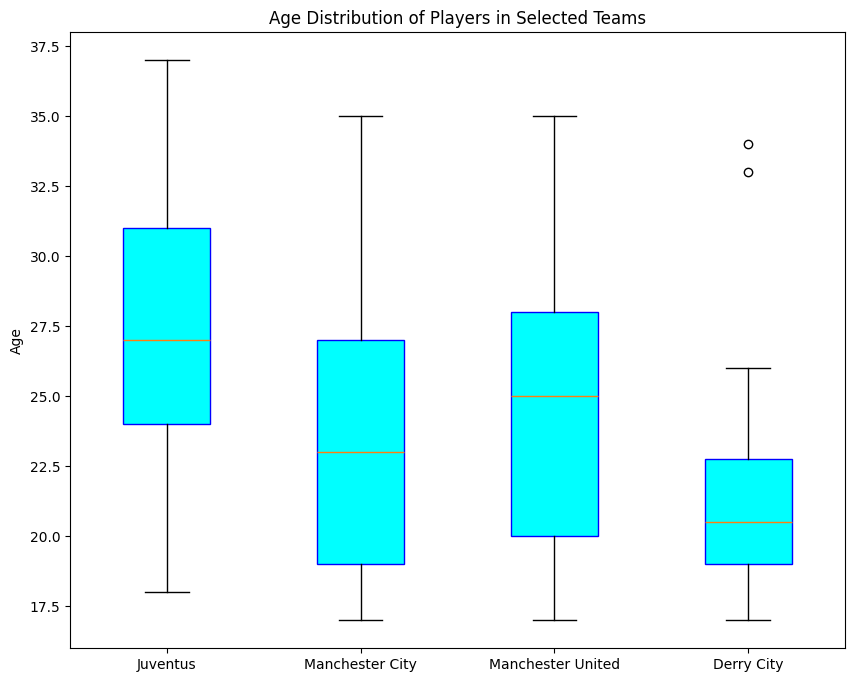

In [174]:
import matplotlib.pyplot as plt

# Extract the Ages of Players from each specified team
juventus_ages = df.loc[df.Club == "Juventus"]['Age']
man_city_ages = df.loc[df.Club == "Manchester City"]['Age']
man_united_ages = df.loc[df.Club == "Manchester United"]['Age']
derry_city_ages = df.loc[df.Club == "Derry City"]['Age']

# Add the results to a list
clubs_ages = [juventus_ages, man_city_ages, man_united_ages, derry_city_ages]

# Define the labels for the boxplot
labels = ['Juventus', 'Manchester City', 'Manchester United', 'Derry City']

# Set the chart size
plt.figure(figsize=(10, 8))

# Provide a meaningful title and y label
plt.title('Age Distribution of Players in Selected Teams')
plt.ylabel('Age')

# Create the boxplot with a custom box color
plt.boxplot(clubs_ages, labels=labels, patch_artist=True,
            boxprops=dict(facecolor='cyan', color='blue'))

# Show the plot
plt.show()


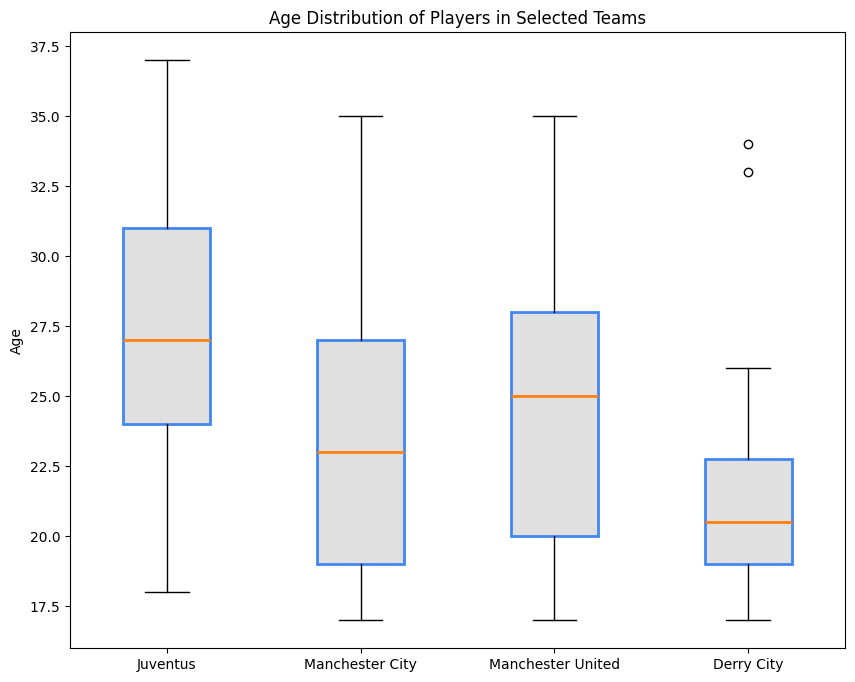

In [182]:
#Create the Box & Whisker Chart
plt.figure(figsize=(10,8), dpi=100)

plt.style.use('default')

#specify the labels for each segment - make sure that they match the order of the clubs list
labels = ['Juventus', 'Manchester City', 'Manchester United', 'Derry City']

#Plot the chart using required parameters
#patch_artist is a facecolour
bp = plt.boxplot(clubsAge, labels=labels, patch_artist=True, medianprops={'linewidth': 2})

plt.title('Age Distribution of Players in Selected Teams')
plt.ylabel('Age')

#We can style the boxes
for box in bp['boxes']:
    # change outline color
    box.set(color='#4286f4', linewidth=2)
    # change fill color to grey - but you must set patch_artist property to True - see above
    box.set(facecolor = '#e0e0e0' )
    # change hatch
    #box.set(hatch = '/')
    
plt.show()
